# Neuro

In [1]:
%load_ext autoreload
%load_ext autotime

import os
import glob
import random
import sys
import math
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)

import matplotlib.pyplot as plt
import pandas as pd


time: 795 ms (started: 2022-05-17 14:46:52 -05:00)


In [2]:
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute_cell_velocity
from celldancer.pseudo_time import pseudo_time

time: 2.62 s (started: 2022-05-17 14:46:53 -05:00)


## Set Parameters

In [3]:
n_neighbors=200
downsample_step=(60,60)

time: 747 µs (started: 2022-05-17 14:46:56 -05:00)


## Load detail

In [4]:
detail_result_path = '/Users/pengzhizhang/pseudotime/data/neuro/velocity_result'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail.csv')
load_cellDancer=pd.read_csv(detail_file)

time: 1min 26s (started: 2022-05-17 14:46:58 -05:00)


## Visualize gene velocity

In [5]:
xlim = (-25, 30)
ylim = (-25, 30)

time: 2.19 ms (started: 2022-05-17 14:48:25 -05:00)


In [8]:
%autoreload 2

gene_choice=list(set(load_cellDancer.gene_name))
load_cellDancer = compute_cell_velocity(
    load_cellDancer=load_cellDancer,
    gene_list=gene_choice,
    mode="embedding",
    transfer_mode=None,
    n_neighbors=n_neighbors,
    step=downsample_step)

(genes, cells): (2145, 18140)
After downsampling, there are  888 cells.
time: 2min 19s (started: 2022-05-17 14:53:45 -05:00)


In [9]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,cellID,clusters,embedding1,embedding2,velocity1,velocity2
0,0,0610007P14Rik,1.232261,0.072207,1.259473,0.074903,0.064000,0.811681,0.003397,0.060301,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429,NaN,NaN
1,1,0610007P14Rik,1.133782,0.078814,1.163397,0.078786,0.063456,0.805846,0.003776,0.060301,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895,NaN,NaN
2,2,0610007P14Rik,1.514005,0.135724,1.567264,0.119788,0.078587,0.813846,0.002602,0.060301,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419,NaN,NaN
3,3,0610007P14Rik,0.694710,0.067970,0.719411,0.068489,0.054528,0.786969,0.005885,0.060301,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485,NaN,NaN
4,4,0610007P14Rik,0.892577,0.113096,0.934898,0.100961,0.064767,0.787270,0.004924,0.060301,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38910295,18135,Zwint,0.628872,0.102383,0.661537,0.112521,0.107899,0.855837,0.035450,0.062125,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668,NaN,NaN
38910296,18136,Zwint,2.242793,0.237419,2.335716,0.236443,0.224360,0.953217,0.018043,0.062125,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788,NaN,NaN
38910297,18137,Zwint,0.279290,0.154337,0.335284,0.164991,0.144815,0.800248,0.041252,0.062125,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364,NaN,NaN
38910298,18138,Zwint,0.697305,0.128248,0.740287,0.132708,0.119159,0.859578,0.034811,0.062125,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549,NaN,NaN


time: 17 ms (started: 2022-05-17 14:57:08 -05:00)


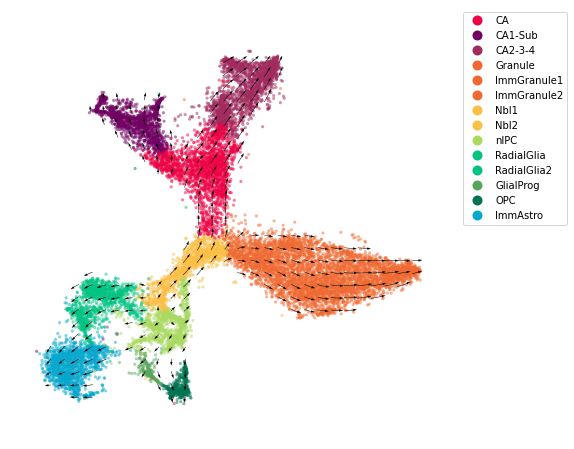

time: 12.5 s (started: 2022-05-17 14:57:17 -05:00)


In [10]:
%autoreload 2

fig, ax = plt.subplots(figsize=(8,8))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_neuro, alpha=0.5, s=10,
             gene_name=None, velocity=True, custom_xlim=xlim, custom_ylim=ylim, legend='on')
ax.axis('off')
plt.show()

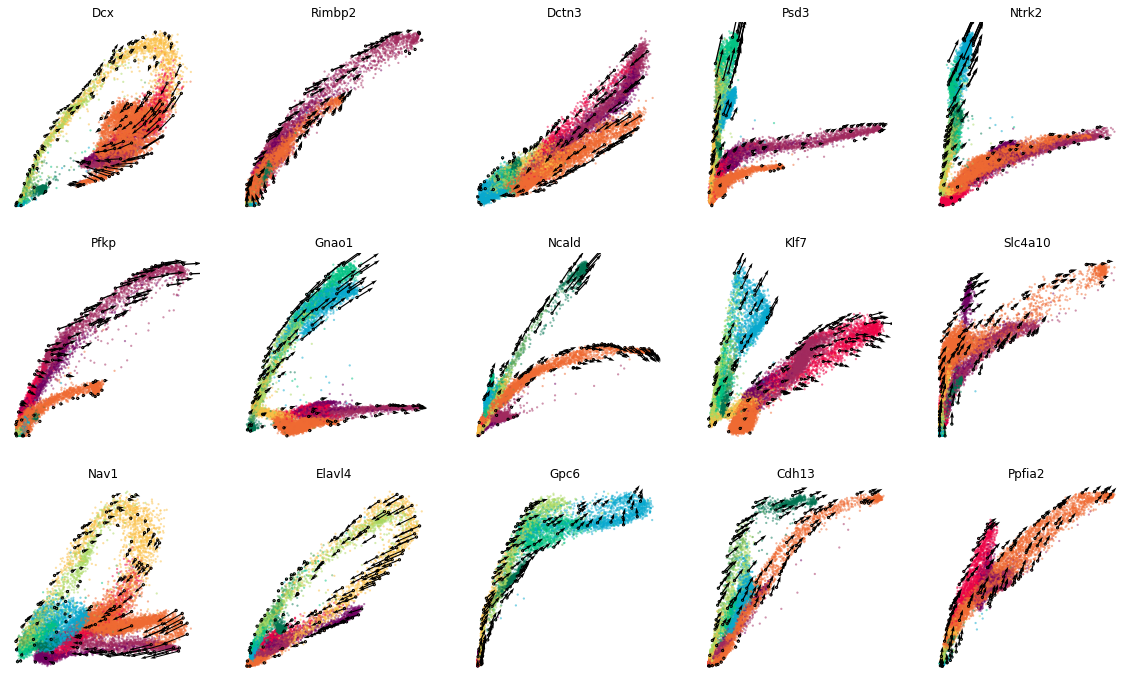

time: 1min 55s (started: 2022-05-04 23:44:38 -05:00)


In [16]:
gene_list=['Dcx','Rimbp2','Dctn3','Psd3','Ntrk2',
           'Pfkp','Gnao1','Ncald','Klf7','Slc4a10',
           'Nav1','Elavl4','Gpc6','Cdh13','Ppfia2']


ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

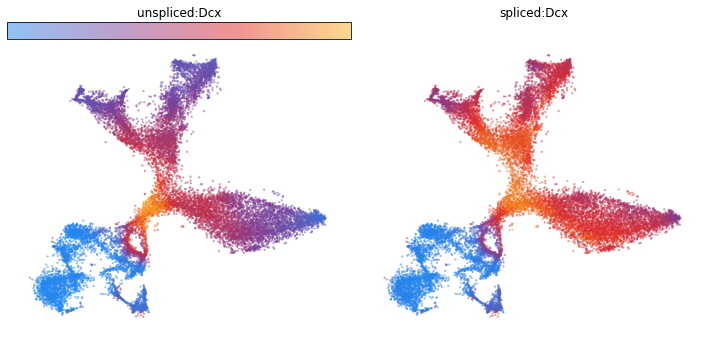

time: 10.3 s (started: 2022-05-04 23:44:06 -05:00)


In [13]:
%autoreload 2

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
gene = 'Dcx'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='unspliced', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim, colorbar='on')
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='spliced', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim, colorbar='off')

ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('unspliced:'+gene)
ax[1].set_title('spliced:'+gene)
plt.tight_layout()
plt.show()

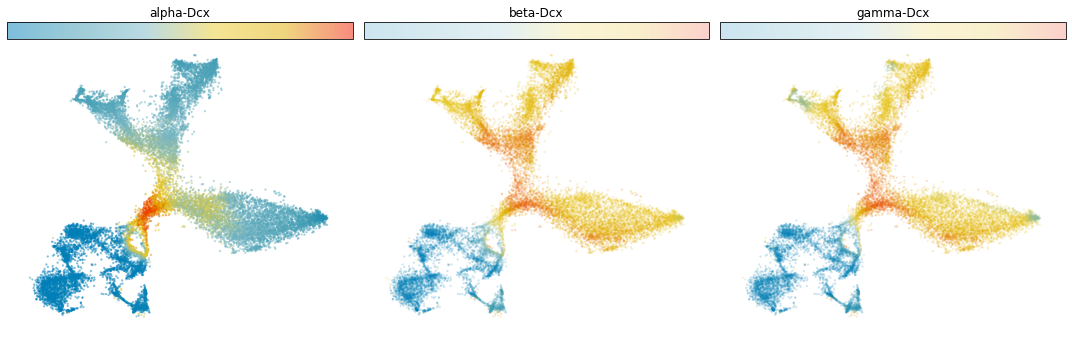

time: 15.5 s (started: 2022-05-04 23:44:17 -05:00)


In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
gene = 'Dcx'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim)
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=xlim, custom_ylim=ylim)
im2=cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=xlim, custom_ylim=ylim)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
plt.tight_layout()
plt.show()

## Estimate pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8880/8880 [02:08<00:00, 69.17it/s]


Those path clusters are removed:  {3, 6}
There are 5 clusters.
[0 1 2 4 5]


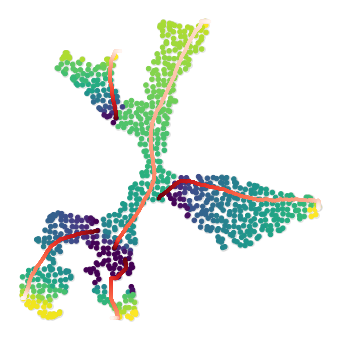




Cluster  0
Total cells in the cluster:  345
MAX allowed zero time cells:  17
MAX allowed terminal cells:  17
Only  1  terminal cells left.
[603]
44  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 440/440 [00:09<00:00, 48.14it/s]





Cluster  0
Total cells in the cluster:  44
MAX allowed zero time cells:  17
MAX allowed terminal cells:  17
Only  2  zero cells left. 
[306, 576]
Only  1  terminal cells left.
[27]
number of paths:  2 2

Display reference paths for cluster 0


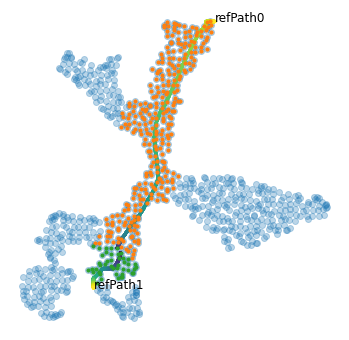


intercluster cell time adjustment
number of cells:  345
Cutoff is  0.06886864877680311
Number of nodes:  2
clusterIDs:  [0, 1]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (318, 579)
pair_cellIDs:  (505, 576)
pair_cellIDs:  (425, 80)
pair_cellIDs:  (204, 682)
pair_cellIDs:  (451, 598)
pair_cellIDs:  (725, 306)
pair_cellIDs:  (22, 403)
pair_cellIDs:  (808, 653)
pair_cellIDs:  (836, 24)
pair_cellIDs:  (802, 488)
pair_cellIDs:  (709, 845)
pair_cellIDs:  (16, 3)
pair_cellIDs:  (90, 258)
pair_cellIDs:  (671, 138)
pair_cellIDs:  (343, 193)

Peak mode:  most_frequent_shift


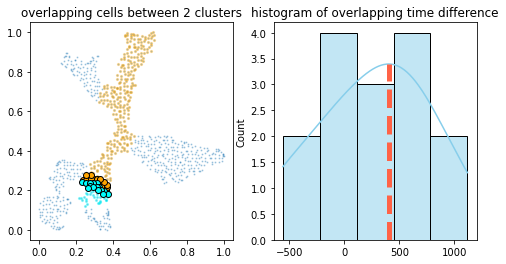

Time shift is:  426
The overlapping cells are: 
cell  709  from cluster  0  and  845  from cluster  1


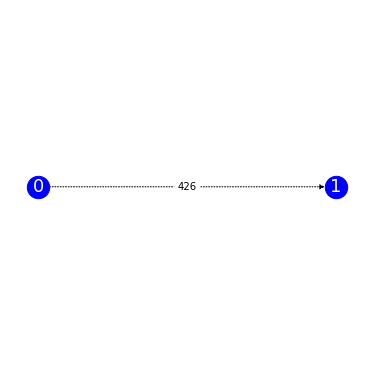

Connected components:  {0, 1}
All nodes adjustment:  {0: 0, 1: 426}



Cluster  1
Total cells in the cluster:  252
MAX allowed zero time cells:  12
MAX allowed terminal cells:  12
Only  0  zero cells left. 
[]
Only  2  terminal cells left.
[599, 703]
number of paths:  1 1

Display reference paths for cluster 1


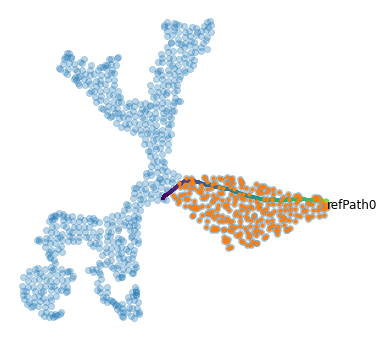




Cluster  2
Total cells in the cluster:  153
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  1  zero cells left. 
[446]
Only  1  terminal cells left.
[530]
number of paths:  1 1

Display reference paths for cluster 2


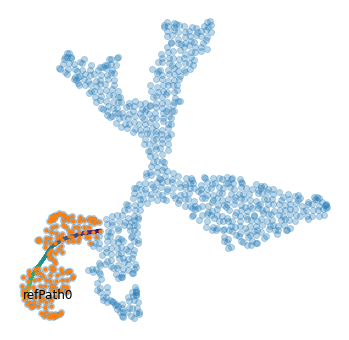




Cluster  4
Total cells in the cluster:  95
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  2  zero cells left. 
[33, 406]
Only  1  terminal cells left.
[663]
number of paths:  1 1

Display reference paths for cluster 4


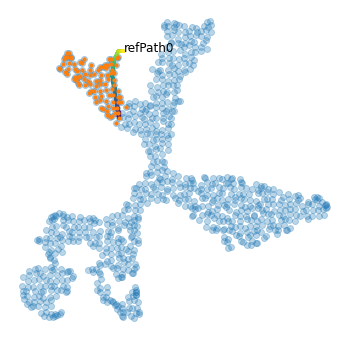




Cluster  5
Total cells in the cluster:  43
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  5  terminal cells left.
[609, 611, 631, 651, 732]
number of paths:  1 1

Display reference paths for cluster 5


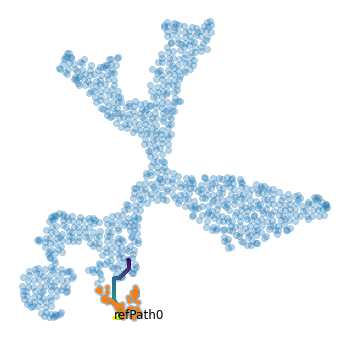




All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  888
Cutoff is  0.07406662738988341
Number of nodes:  5
clusterIDs:  [0, 1, 2, 4, 5]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (799, 688)
pair_cellIDs:  (159, 187)
pair_cellIDs:  (540, 629)
pair_cellIDs:  (336, 877)
pair_cellIDs:  (811, 382)
pair_cellIDs:  (213, 443)
pair_cellIDs:  (197, 367)
pair_cellIDs:  (857, 506)
pair_cellIDs:  (72, 567)
pair_cellIDs:  (689, 445)
pair_cellIDs:  (140, 396)

Peak mode:  most_frequent_shift


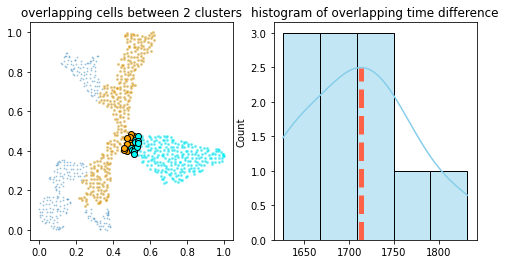

Time shift is:  1717
The overlapping cells are: 
cell  159  from cluster  0  and  187  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (343, 414)
pair_cellIDs:  (80, 564)
pair_cellIDs:  (876, 424)
pair_cellIDs:  (850, 446)
pair_cellIDs:  (425, 260)
pair_cellIDs:  (386, 14)
pair_cellIDs:  (204, 2)
pair_cellIDs:  (557, 345)
pair_cellIDs:  (682, 261)
pair_cellIDs:  (738, 79)
pair_cellIDs:  (333, 246)
pair_cellIDs:  (90, 305)
pair_cellIDs:  (50, 707)
pair_cellIDs:  (628, 175)

Peak mode:  most_frequent_shift


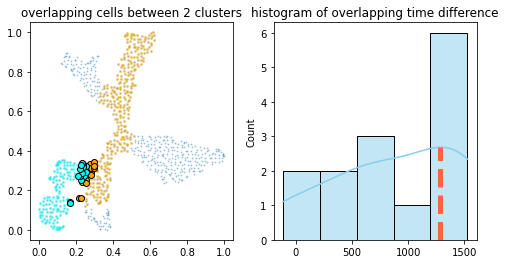

Time shift is:  1342
The overlapping cells are: 
cell  386  from cluster  0  and  14  from cluster  2

Consolidating time between clusters  0  and  4 ...
pair_cellIDs:  (188, 18)
pair_cellIDs:  (334, 406)
pair_cellIDs:  (156, 217)
pair_cellIDs:  (311, 33)
pair_cellIDs:  (179, 375)
pair_cellIDs:  (265, 146)
pair_cellIDs:  (226, 65)
pair_cellIDs:  (358, 322)
pair_cellIDs:  (390, 126)
pair_cellIDs:  (47, 324)
pair_cellIDs:  (292, 207)
pair_cellIDs:  (53, 297)

Peak mode:  most_frequent_shift


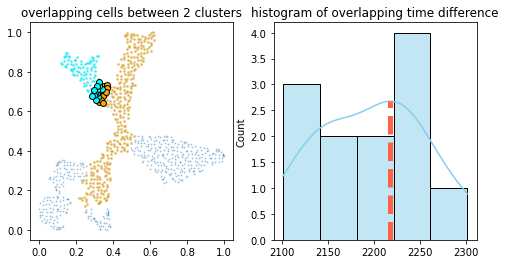

Time shift is:  2210
The overlapping cells are: 
cell  188  from cluster  0  and  18  from cluster  4

Consolidating time between clusters  0  and  5 ...
pair_cellIDs:  (27, 833)
pair_cellIDs:  (670, 344)
pair_cellIDs:  (157, 199)
pair_cellIDs:  (471, 581)
pair_cellIDs:  (319, 789)
pair_cellIDs:  (554, 593)
pair_cellIDs:  (679, 415)
pair_cellIDs:  (555, 887)
pair_cellIDs:  (494, 756)

Peak mode:  most_frequent_shift


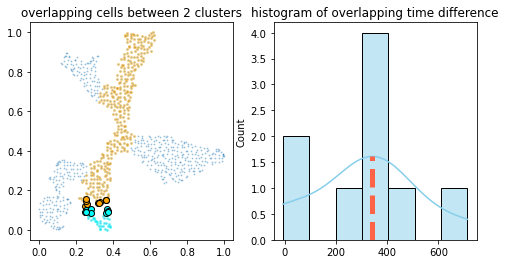

Time shift is:  0
The overlapping cells are: 
cell  555  from cluster  0  and  887  from cluster  5

Consolidating time between clusters  1  and  2 ...
No close cells between clusters	 (1, 2)

Consolidating time between clusters  1  and  4 ...
No close cells between clusters	 (1, 4)

Consolidating time between clusters  1  and  5 ...
No close cells between clusters	 (1, 5)

Consolidating time between clusters  2  and  4 ...
No close cells between clusters	 (2, 4)

Consolidating time between clusters  2  and  5 ...
No close cells between clusters	 (2, 5)

Consolidating time between clusters  4  and  5 ...
No close cells between clusters	 (4, 5)


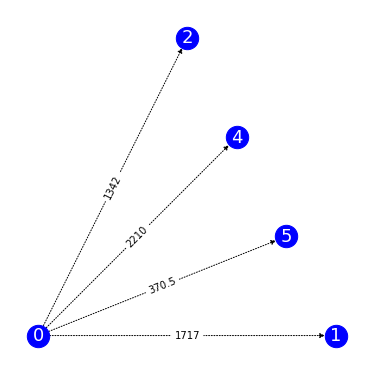

Connected components:  {0, 1, 2, 4, 5}
All nodes adjustment:  {0: 0, 1: 1717, 2: 1342, 4: 2210, 5: 0}


All inter cluster cell time has been resolved.



There are 18140 cells.


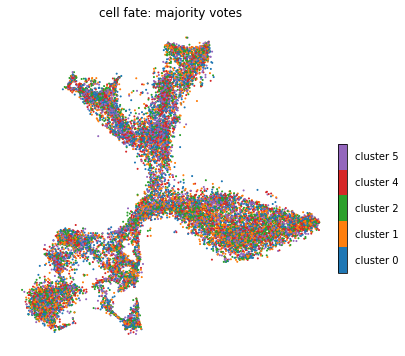

--- 219.74144911766052 seconds ---
time: 3min 40s (started: 2022-05-18 14:15:22 -05:00)


In [28]:
%autoreload 2

dt = 0.001
t_total = {0.001: 10000}
n_repeats = 10

grid = (30, 30)
load_cellDancer = pseudo_time(
    load_cellDancer=load_cellDancer, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    downsample_step=downsample_step,
    path_similarity = 0.15,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=12)

In [41]:
a = np.random.randint(6, size=(100))

time: 1.57 ms (started: 2022-05-18 14:44:56 -05:00)


In [42]:
for i in range(len(a)-1):
    if a[i+1]-a[i]>1:
        print(a[i+1])

4
5
5
3
5
4
5
5
5
5
5
4
4
5
5
2
3
4
5
4
4
3
5
3
5
4
4
4
3
3
5
3
time: 1.55 ms (started: 2022-05-18 14:45:23 -05:00)


In [44]:
a = np.array([0,1,2,4,6])
b = np.array([0,1,2,3,4])
cm = dict(zip(a,b))

time: 1 ms (started: 2022-05-18 14:47:15 -05:00)


In [50]:
np.linspace(0.3,0.1,21)

array([0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 ,
       0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 ])

time: 2.86 ms (started: 2022-05-18 15:15:27 -05:00)


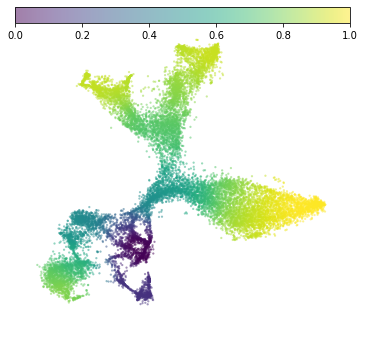

time: 10.7 s (started: 2022-05-18 14:22:38 -05:00)


In [29]:
fig, ax = plt.subplots(figsize=(6,6))
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             gene_name=None, velocity=False, custom_xlim=(-25,30), custom_ylim=(-25,30))
ax.axis('off')
plt.savefig("neuro_pseudo_time.pdf")

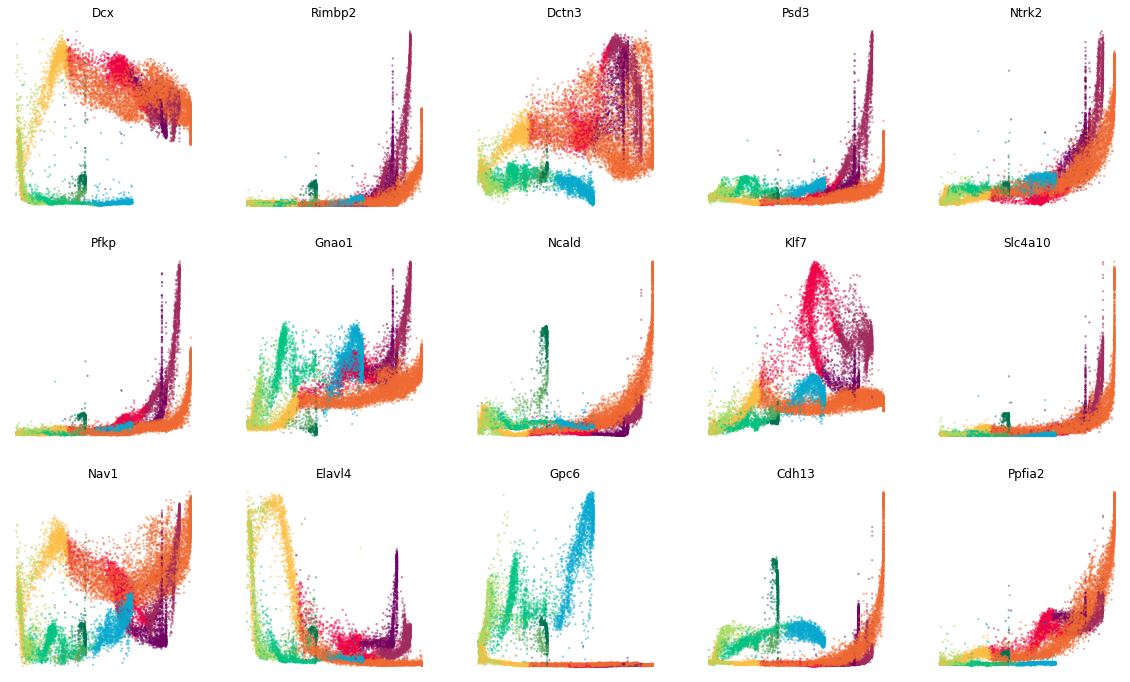

time: 1min 6s (started: 2022-05-18 10:28:09 -05:00)


In [21]:
gene_list=['Dcx','Rimbp2','Dctn3','Psd3','Ntrk2',
           'Pfkp','Gnao1','Ncald','Klf7','Slc4a10',
           'Nav1','Elavl4','Gpc6','Cdh13','Ppfia2']


ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='spliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')
plt.savefig("neuro_gene_spliced_vs_pseudotime.pdf")

In [25]:
import numpy as np
a = np.array([1,2,3,5])

time: 745 µs (started: 2022-05-18 14:12:29 -05:00)


In [39]:
for i in range(len(a)-1):
    if a[i+1]-a[i]> 1:
        print(a[i+1])
    

4
6
time: 1.21 ms (started: 2022-05-18 14:31:25 -05:00)



## Graph representation of the cell fates


In [18]:
#!conda install -c pyviz holoviews bokeh -y
%autoreload 2
import pandas as pd 
import numpy as np
import os
import networkx as nx

import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle
from celldancer.utilities import extract_from_df

time: 4.13 s (started: 2022-05-06 09:13:36 -05:00)


In [20]:
def layout_graph(data, radius):
    def create_KNN_based_graph():
        from sklearn.neighbors import NearestNeighbors
        neigh = NearestNeighbors(radius = radius)
        neigh.fit(embedding_ds)
        nn_graph = neigh.radius_neighbors_graph(embedding_ds, mode='connectivity')
        nn_array = nn_graph.toarray()
   
        # nn_array is effectively the edge list
        # Keep track of cells of 0 timeshift.
        node_list = [(i, {'ptime': ptime_ds[i,0], 'cluster':clusters_ds[i]}) 
                     for i in range(len(embedding_ds))]
        
        dtime = ptime_ds[:,0] - ptime_ds
        INF = 1./np.min(np.abs(dtime[dtime != 0]))

        # upper triangle of the knn array (i<j and nn_array[i,j] = 1)
        edge_filter = np.triu(nn_array, k=1)
        (i,j) = np.where(edge_filter != 0)

        # for forcedirected layouts, 
        # edge length is positively correlated with weight.
        # hence 1/dtime here as the weight
        # Created for directed graph
        edge_list = list()
        for a,b,w in zip(i,j, dtime[i,j]):
            if w>0:
                edge_list.append((a, b, 1/w))
            elif w<0:
                edge_list.append((a, b, -1/w))
            else:
                #print(a,b)
                edge_list.append((a, b, INF))

        G = nx.Graph()
        G.add_nodes_from(node_list)
        G.add_weighted_edges_from(edge_list)

        return G
    
    
    embedding = extract_from_df(data, ['embedding1', 'embedding2'])
    n_cells = embedding.shape[0]
    sample_cells = load_cellDancer['velocity1'][:n_cells].dropna().index
    clusters = extract_from_df(data, ['clusters'])
    ptime = extract_from_df(data, ['pseudotime'])
    
    embedding_ds = embedding[sample_cells]
    ptime_ds = ptime[sample_cells]
    clusters_ds = clusters[sample_cells]

    G = create_KNN_based_graph()
    
    index = np.array(range(len(embedding_ds)), dtype=int)[:,None]
    
    # NOTE!!!
    # the third column of nodes df has to be "index"
    nodes = pd.DataFrame(np.hstack((index, embedding_ds, ptime_ds, clusters_ds)), 
                         columns=['name','x','y','ptime','clusters'])
    
    edges = pd.DataFrame([(i[0], i[1], G.edges[i]['weight']) for i in G.edges], 
                         columns=['source', 'target', 'weight'])   
    return G, nodes, edges


G, nodes, edges = layout_graph(load_cellDancer, 5)

time: 5.32 s (started: 2022-05-06 09:14:39 -05:00)


In [21]:
forcedirected = forceatlas2_layout(nodes[['name','clusters']], edges, weight='weight', iterations=200, seed=10)

time: 27.1 s (started: 2022-05-06 09:14:47 -05:00)


In [22]:
forcedirected['gene_name']='gene'

time: 1.06 ms (started: 2022-05-06 09:15:14 -05:00)


In [ ]:
%autoreload 2

fig, ax = plt.subplots(figsize=(6,6))
cdplt.gene.scatter_gene(
    ax=ax,
    x='x',
    y='y',
    load_cellDancer=forcedirected,
    save_path=None,
    custom_xlim=None,
    custom_ylim=None,
    colors=colormap.colormap_erythroid,
    alpha=1, 
    s = 20,
    gene_name='gene')

ax.set_title('graph representation')
ax.axis('off')

plt.show()

In [249]:
def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg), px=1, name=name)

def edgesplot(edges, name=None, canvas=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), name=name)
    
def graphplot(nodes, edges, name="", canvas=None, cat=None):
    if canvas is None:
        xr = nodes.x.min(), nodes.x.max()
        yr = nodes.y.min(), nodes.y.max()
        canvas = ds.Canvas(**cvsopts)
        
    np = nodesplot(nodes, name + " nodes", canvas, cat)
    ep = edgesplot(edges, name + " edges", canvas)
    return tf.stack(ep, np, how="over", name=name)

time: 1.52 ms (started: 2022-05-04 10:32:10 -05:00)


In [ ]:
from datashader.layout import circular_layout

circular  = circular_layout(nodes, uniform=False)
cd = circular
fd = forcedirected

%time cd_d = graphplot(cd, connect_edges(cd,edges), "Circular layout")
%time fd_d = graphplot(fd, connect_edges(fd,edges), "Force-directed") 
%time cd_b = graphplot(cd, hammer_bundle(cd,edges), "Circular layout, bundled")
%time fd_b = graphplot(fd, hammer_bundle(fd,edges), "Force-directed, bundled") 

tf.Images(cd_d,fd_d,cd_b,fd_b).cols(2)

In [ ]:
graph = hv.Graph((edges, forcedirected))
graph.opts(node_size=3, edge_line_width=0.1,
            node_line_color='gray', 
            cmap='viridis', node_color='clusters',
            edge_alpha=0.1, node_alpha=1)

graph

In [ ]:
graph.nodes.data

In [ ]:
help(forcedirected.rename)

In [ ]:
simple_graph.nodes.data

In [ ]:
from holoviews.operation.datashader import datashade, bundle_graph
bundled = bundle_graph(graph)
bundled



In [ ]:
# %%
overlay = datashade(bundled, width=800, height=800) * bundled.select(pseudotime=(0,0.05))
overlay.opts(opts.Graph(node_size=10))

# %%
from bokeh.plotting import figure, output_notebook,reset_output, show
from bokeh.models import ColumnDataSource, Arrow, OpenHead, NormalHead, VeeHead

cds = ColumnDataSource(data=dict(x_start=[0,1, 2], y_start=[0,1, 2], x_end=[1,3, 5], y_end=[0,5, 8], line_width=[1]*3, color=['red','blue','yellow']))
arr = Arrow(end=NormalHead(), source=cds, line_color='color', line_width='line_width', x_start='x_start', y_start='y_start', x_end='x_end', y_end='y_end')



In [ ]:

# %%
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

kwargs = dict(width=1000, height=1000, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))
# %%
from holoviews.element.graphs import layout_nodes
layout_nodes(graph, layout=nx.spring_layout, 
             kwargs={'weight':'weight', 'iterations':200, 'seed':100})


In [493]:
# Declare abstract edges
N = 8
node_indices = np.arange(N)
source = np.zeros(N)
target = node_indices

simple_graph = hv.Graph(((source, target),))
simple_graph
# Node info
np.random.seed(7)
x, y = simple_graph.nodes.array([0, 1]).T
node_labels = ['Output']+['Input']*(N-1)
edge_weights = np.random.rand(8)

# Declare Graph
nodes = hv.Nodes((x, y, node_indices, node_labels), vdims='Type')
graph = hv.Graph(((source, target, edge_weights), nodes, paths), vdims='Weight')

graph.opts(node_color='Type', edge_color='Weight', cmap=['blue', 'red'], edge_cmap='viridis')

:Graph   [start,end]   (Weight)

time: 137 ms (started: 2022-05-04 14:15:49 -05:00)


In [511]:
simple_graph.nodes.dimensions()

[Dimension('x'), Dimension('y'), Dimension('index')]

time: 2.17 ms (started: 2022-05-04 14:23:08 -05:00)
